# Required libraries

In [1]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\suhai\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\suhai\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
#pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [23]:
import numpy as np
import pandas as pd
import re

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize 

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics import accuracy_score, confusion_matrix 
from sklearn import svm

import matplotlib.pyplot as plt
import seaborn as sb

# Importing the files

In [4]:
# Reading both the train and test dataset
train_df = pd.read_csv("movie_review_train.csv")
test_df = pd.read_csv("movie_review_test.csv")

In [5]:
# Example of dataset
train_df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [6]:
# Number of positive and negative sentiment in test dataset
test_df.sentiment.value_counts()

positive    769
negative    731
Name: sentiment, dtype: int64

<AxesSubplot:xlabel='sentiment', ylabel='count'>

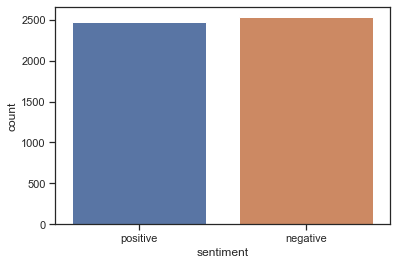

In [7]:
# Distrubution of positive & negative sentiment in train dataset
sb.set(style = "ticks", color_codes = True)
sb.countplot(x = "sentiment", data = train_df)

# Cleaning and processing reviews of both train & test dataset

In [8]:
def processing_reviews(df):
    
    data = []
    ps = PorterStemmer()
    reviews = df['review']

    #going through each review in the dataframe
    for review in reviews:
            
    #converting text to lowercase
        lw_reviews = review.lower()
    
    #removing characters that aren't in the alphabet
        cleaned_reviews = re.sub(r"[^a-zA-Z]", " ", lw_reviews)
        tokenize = word_tokenize(cleaned_reviews)

    #adding STEM of the tokens that aren't in "stopwords" to a list
        stem_list = [ps.stem(word) for word in tokenize if word not in set(stopwords.words('english'))]

    #turning list into a string
        joined_text = ' '.join(stem_list)

        data.append(joined_text)
    
    return data

In [9]:
# Example of above function

print("Review before processing: \n")
print(train_df["review"][0])

cleaned_review = processing_reviews(train_df.head(1))

print("\nReview after processing: \n")
print(cleaned_review[0])

Review before processing: 

One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal o

In [10]:
# Applying processing_function on the train and test dataset
X_train_data = processing_reviews(train_df)
X_test_data = processing_reviews(test_df)

# Generating a word cloud of all the reviews

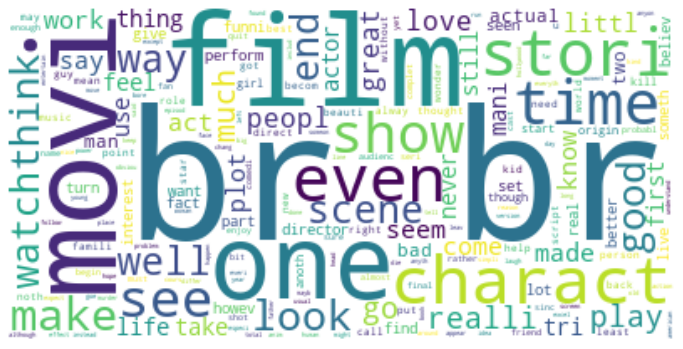

In [11]:
# combining both train and test reviews
total_reviews = X_train_data + X_test_data
string_txt = " "

# joing reviews from the list as string
for review in total_reviews:
    string_txt += str(review)
    
# Generating the word cloud
from wordcloud import WordCloud
plt.figure(figsize=(12,12))
wordcloud = WordCloud(background_color="white").generate(string_txt)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

# Extracting bag of words and returning (X train & test set)

In [12]:
def bag_of_words(train_data, test_data):
    
    # using vectorizer to generate bag of words
    TFV = TfidfVectorizer()
    vector = TFV.fit_transform(train_data)
    X_train = TFV.fit_transform(train_data).toarray()  
    TFVTest = TfidfVectorizer(vocabulary = TFV.vocabulary_)
    X_test = TFVTest.fit_transform(test_data).toarray() 
    feature_vector = TFV.get_feature_names()
    
    return X_train, X_test, vector, feature_vector

In [13]:
# Applying the bag_of_words to train and test data

X_train, X_test, vector, feature_vector = bag_of_words(X_train_data, X_test_data)

# Sentiment columns give the y set of both train and test
Y_train = train_df['sentiment'] 
Y_test = test_df['sentiment'] 

In [14]:
DF = pd.DataFrame(vector.A, columns = feature_vector)
# ouputting vector dataframe for each review
print('\n')
print('Count Vector for Review:')
display(DF)



Count Vector for Review:


,aaa,aaah,aaargh,aaaugh,aag,aaip,aaliyah,aam,aamir,aamto,...,zucker,zudina,zue,zulu,zuniga,zurich,zwart,zwick,zzzzip,zzzzzzzzzzzzzzzzzz
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# TASK 1: SVM Classification

## Custom Kernel

In [31]:
# Custom kernel 1

def custom_log(X,Y):
    K = 1
    D = euclidean_distances(X, Y)
    return -np.log(D ** K + 1)

# Custom kernel 2

def custom_cauchy(X, Y):

    D = euclidean_distances(X, Y) ** 2
    return 1 / (1 + D / (0.5))


In [32]:
class SVMClassifier:
    
    def __init__(self, kernel, gamma, decision_function_shape, C):
        from sklearn import svm
        self.kernel = kernel
        self.gamma = gamma
        self.decision_function_shape = decision_function_shape
        self.C = C
    
        self.classifier = svm.SVC(kernel=kernel, gamma=gamma, decision_function_shape=decision_function_shape, C=C)
        
    def fit(self, X, y):
        self.classifier.fit(X, y)
    
    def predict(self, X):
        return self.classifier.predict(X)

In [33]:
# function for displaying confusion matrix
def matrix(values):
    
    # matrix labels
    types = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
    # count of each type
    type_count = ["{0:0.0f}".format(value) for value in values.flatten()]
    # percentage of each type
    type_percent = ["{0:.2%}".format(value) for value in (values.flatten() / np.sum(values))]
    
    # converting all values to list
    label = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip (types, type_count, type_percent)]
    label = np.asarray(label).reshape(2,2)
    
    # using seaborn to create a heatmap
    chart = sb.heatmap(values, annot = label, fmt = '', cmap = 'PuBu')
    
    return chart

# Tweaking with the SVM classifier

### changing the values of gamma with custom log kernel

Accuracy: 0.8713333333333333
Accuracy: 0.8713333333333333
Accuracy: 0.8713333333333333
Accuracy: 0.8713333333333333


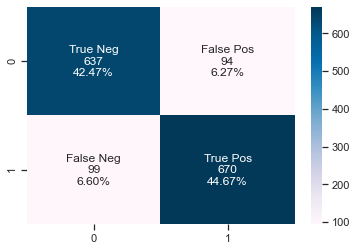

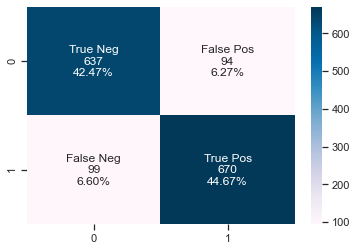

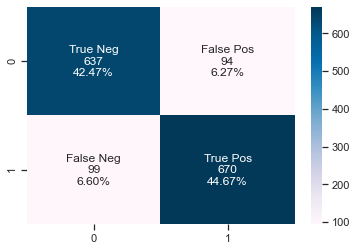

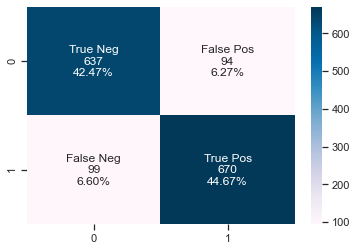

In [41]:
gamma = [0.001,0.1,1,10]
for g in gamma:
    sc = SVMClassifier(kernel=custom_log, gamma = g, decision_function_shape = 'ovo',C = 10)
    sc.fit(X_train, Y_train)
    Y_Pred = sc.predict(X_test)
    acc = accuracy_score(Y_test, Y_Pred)
    print("Accuracy:",acc)

    CFM = confusion_matrix(Y_test, Y_Pred)
    plt.figure()
    matrix(CFM)

### Keeping custom log kernel with changing values of C

Accuracy: 0.7646666666666667
Accuracy: 0.8746666666666667
Accuracy: 0.8713333333333333
Accuracy: 0.8713333333333333


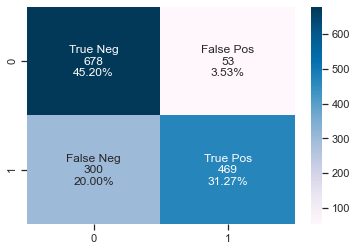

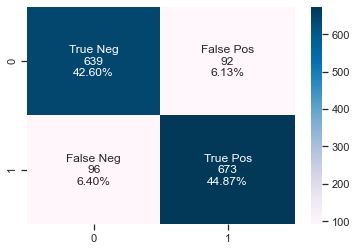

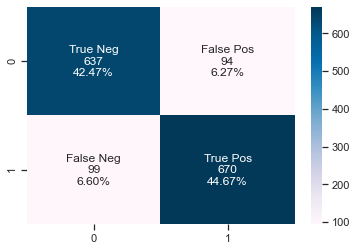

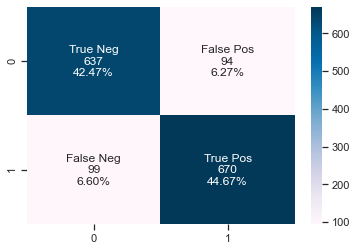

In [42]:
C = [0.1,1,10,20]

for c in C:
    sc = SVMClassifier(kernel=custom_log, gamma = "scale", decision_function_shape = 'ovo',C = c)
    sc.fit(X_train, Y_train)
    Y_Pred = sc.predict(X_test)
    acc = accuracy_score(Y_test, Y_Pred)
    print("Accuracy:",acc)

    CFM = confusion_matrix(Y_test, Y_Pred)
    plt.figure()
    matrix(CFM)

Accuracy: 0.48733333333333334
Accuracy: 0.8746666666666667
Accuracy: 0.8746666666666667
Accuracy: 0.8746666666666667


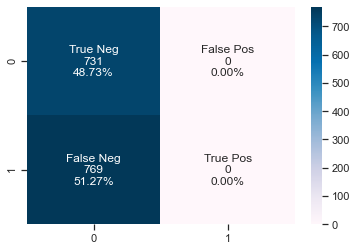

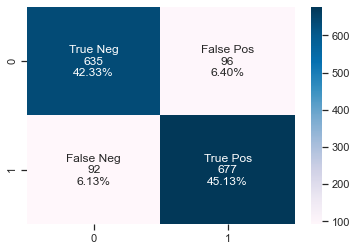

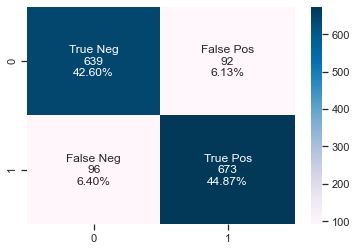

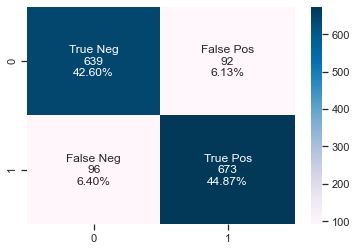

In [45]:
C = [0.1,1,10,20]

for c in C:
    sc = SVMClassifier(kernel=custom_cauchy, gamma = "scale", decision_function_shape = 'ovo',C = c)
    sc.fit(X_train, Y_train)
    Y_Pred = sc.predict(X_test)
    acc = accuracy_score(Y_test, Y_Pred)
    print("Accuracy:",acc)

    CFM = confusion_matrix(Y_test, Y_Pred)
    plt.figure()
    matrix(CFM)

### Trying with the built-in kernels

Accuracy: 0.8706666666666667
Accuracy: 0.8306666666666667
Accuracy: 0.8733333333333333
Accuracy: 0.8713333333333333


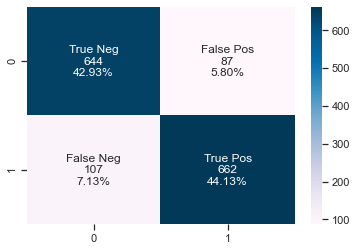

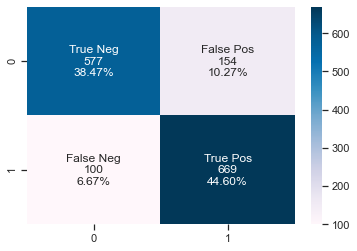

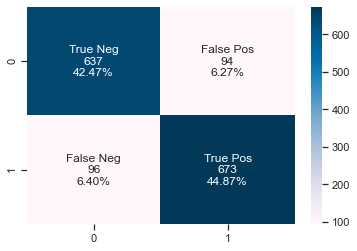

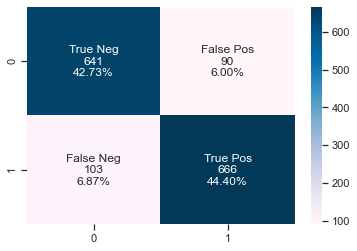

In [48]:
kernel = ['linear', 'poly', 'rbf', 'sigmoid']

for k in kernel:
    sc = SVMClassifier(kernel=k, gamma = "scale", decision_function_shape = 'ovo',C = 1)
    sc.fit(X_train, Y_train)
    Y_Pred = sc.predict(X_test)
    acc = accuracy_score(Y_test, Y_Pred)
    print("Accuracy:",acc)

    CFM = confusion_matrix(Y_test, Y_Pred)
    plt.figure()
    matrix(CFM)

[Text(0.5, 0, ''), Text(0, 0.5, 'Accuracy')]

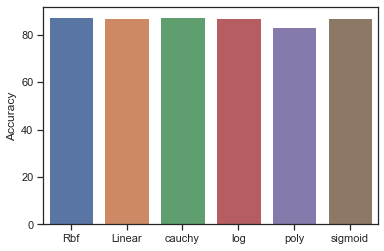

In [51]:
# Comparing the highest accuracy achieved from each of the kernel at common hyperparamters

Accuracy = [{"Rbf": 87.4, "Linear": 87.06, "cauchy": 87.4, "log": 87.13, "poly": 83.06 , "sigmoid": 87.13}]
acc_df = pd.DataFrame.from_dict(Accuracy)
acc_com_plot = sb.barplot(data=acc_df)
acc_com_plot.set(xlabel='', ylabel='Accuracy')

# TASK 2: Boosting

In [54]:
class BoostingClassifier:
    def __init__(self, tree_no , depth):
        
        model_list = [None]
        self.tree_no = tree_no
        self.models = model_list * tree_no
        self.depth = depth

    
    def labels(self, classes):
        self.labels = {}
        self.classes = classes
        
        for i, class_ in enumerate(classes):
            self.labels[class_] = i
    
    def fit(self, X, Y):
        
        import numpy as np
        from sklearn.tree import DecisionTreeClassifier
        
        X = np.float64(X)
        weight_list = []
        
        for i in range(len(Y)):
            weight_list.append(1 / len(Y))
            
        weight_list = np.array(weight_list)
        
        self.labels(np.unique(Y))
        
        for i in range(self.tree_no):
            tree = DecisionTreeClassifier(max_depth=self.depth)
            model = (tree.fit(X, Y, sample_weight=weight_list).predict)
            incorrect_values = model(X) != Y
            error_value = np.average(incorrect_values, weights=weight_list, axis=0)
            
            if error_value == 0:
                error_value = 1e-9

                
            log_value = (np.log((1 - error_value) / error_value) + np.log(len(self.classes) - 1))
            weight_list *= np.exp(log_value * incorrect_values * (weight_list > 0))
            
            self.models[i] = (log_value, model)
    
    def convert_to_label(self, i, classifier): 
        return classifier.classes[i]
    
    def convert_to_vector(self, Y, k, image_class):
        import numpy as np

        new_label = []
        
        for element in Y:
            
            value = np.ones(k) * (-1 / (k - 1))
            value[image_class[element]] = 1
            new_label.append(value)
        
        return np.array(new_label)
    
    def predict(self, X):
        import numpy as np
        
        predictions = []
        
        for val1, val2 in self.models:
            predictions.append((val1 * self.convert_to_vector(val2(X), len(self.classes), self.labels)))

        predictions = sum(predictions)
        vectorize = np.vectorize(self.convert_to_label)
        max_values = vectorize(np.argmax(predictions, axis=1), self)
        
        return max_values

In [ ]:
best_acc2 = 0
best_tree2 = 0
best_depth2 = 0

tree_list2 = []
acc_list2 = []
depth_list2 = []

for i2 in range(10, 100, 10):
    for j2 in range(1, 15):
        

        bc2 = BoostingClassifier(tree_no = i2, depth= j2)
        bc2.fit(X_train, Y_train)
        y_pred2 = bc2.predict(X_test)
        
        acc2 = accuracy_score(Y_test, y_pred2)
        
        if acc2 >= best_acc2:
            
            best_acc2 = acc2
            best_tree2 = i2
            best_depth2 = j2
            
            tree_list2.append(i2)
            acc_list2.append(acc2)
            depth_list2.append(j2)
            
            print('Tree', i2)
            print('Depth', j2)
            print('Accuracy', accuracy_score(Y_test, y_pred2))

Tree 10
Depth 1
Accuracy 0.6593333333333333
Tree 10
Depth 2
Accuracy 0.754
Tree 10
Depth 4
Accuracy 0.782
Tree 10
Depth 5
Accuracy 0.7913333333333333
